In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [2]:
df=pd.read_csv(r"C:\Users\aksha\Downloads\iris.csv")
df        

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [5]:
df.drop('variety',axis=1,inplace=True)

In [6]:
scaler=StandardScaler()

In [7]:
df1=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df1

,sepal.length,sepal.width,petal.length,petal.width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


epsilon = 2n ---->2*4=8
minpoints= D+1 ------>4+1=5

In [9]:
neigh=NearestNeighbors(n_neighbors=8)
nbrs=neigh.fit(df)
dist,indices=nbrs.kneighbors(df)

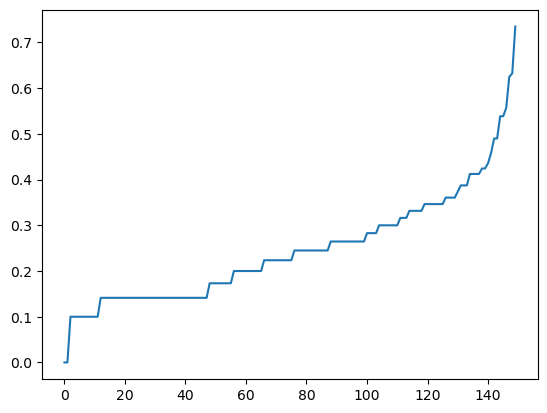

In [10]:
dist=np.sort(dist,axis=0)
dist=dist[:,1]
plt.plot(dist)

### lets assume eps is 0.5

In [11]:
model=DBSCAN(eps=0.5,min_samples=5)
model.fit(df)

DBSCAN()

In [13]:
df['labels1']=model.labels_

In [14]:
df

,sepal.length,sepal.width,petal.length,petal.width,labels1
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [17]:
df['labels1'].value_counts()

 1    84
 0    49
-1    17
Name: labels1, dtype: int64

<Axes: xlabel='petal.length', ylabel='petal.width'>

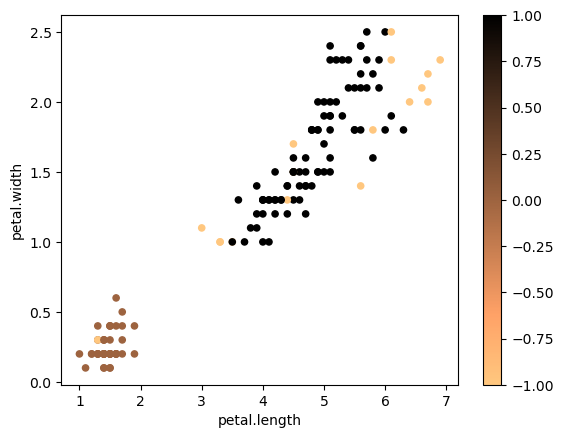

In [18]:
df.plot(x='petal.length',y='petal.width',c=model.labels_,kind='scatter',cmap=plt.cm.copper_r)

here the clusters are overlapping so the silhoutte score will be close to 0

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
silhouette_score(df,model.labels_)

0.6079130430464742

try to improve the model by changing the eps value
if that doesnt work change the clustering model